# The Smile Club

You've been studying about deep learning and computer vision for a while now. One of the consequences of these long hours dedicated to your education, besides growing a huge, manly, spartan beard, is that you've started to feel a bit lonely.

You decided to call a couple of friends and plan a trip. 

However, you don't want neither long faces nor frown foreheads in your trip. This is why you resort to your newly acquired knowledge to allow only the cheeriest and happiest of your friends in.

How? By building a smile detector, of course!

## Preliminaries

Let's load the libraries we will use.

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt

import helpers

%matplotlib inline

Using TensorFlow backend.


Excellent. Let's move on.

## Data

Given that gathering photos from people on Facebook is a bit weird and time consuming, we resort to [this public dataset](https://data.mendeley.com/datasets/yz4v8tb3tp/5) in order to build our model.

In [2]:
# source = /path/to/data/here
X_train, y_train, X_valid, y_valid, X_test, y_test = helpers.load_dataset()

/Users/jesusmartinez/miniconda3/envs/the-smile-club/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Let's print some statistics:

In [3]:
print(f'Number of training examples: {len(X_train)}')
print(f'Number of validation examples: {len(X_valid)}')
print(f'Number of test examples: {len(X_test)}')

Number of training examples: 865
Number of validation examples: 97
Number of test examples: 241


Now, let's take a look at some of our images:

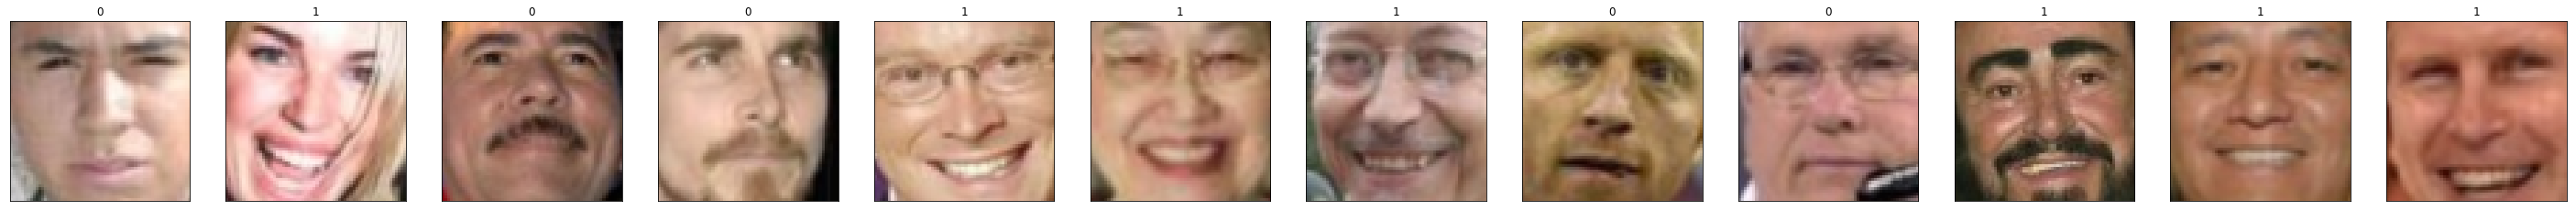

In [4]:
SAMPLE_SIZE = 12

# Plot the images in the sample
figure = plt.figure(figsize=(50, 50))

for sample_index in range(SAMPLE_SIZE):
    ax = figure.add_subplot(1, SAMPLE_SIZE, sample_index + 1, xticks=[], yticks=[])
    ax.imshow(X_train[sample_index])
    ax.set_title(y_train[sample_index])

Here 1 is the class for smile and 0 for non-smile.

## The Happy Model

Let's now proceed to build a model in Keras to detect if a person is smiling or not. Considering that smiling tends to be a trait of happiness, we'll name our algorithm The Happy Model:

In [ ]:
def happy_model(input_shape):
    X_input = Input(input_shape)
       
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)
    X = Dropout(0.5)(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model
    return Model(inputs = X_input, outputs = X, name='happy_model')

In [ ]:
model = happy_model(input_shape=X_train[0].shape)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
__________

Our model is not that big. This is good as it will train faster.

## Train the Model

Let's now train the model using our data. 

First, we must compile it:

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Notice we use adam as the optimizer. It is a great default choice. Other alternatives are SGD and Adagrad, but adam tends to work well most of the time.

Now we can train the model.

In [ ]:
EPOCHS = 35
BATCH_SIZE=64

history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid),
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Train on 865 samples, validate on 97 samples
Epoch 1/35
865/865 [==============================] - 10s 11ms/step - loss: 7.9362 - acc: 0.4786 - val_loss: 6.4805 - val_acc: 0.5979
Epoch 2/35
865/865 [==============================] - 9s 11ms/step - loss: 8.4597 - acc: 0.4751 - val_loss: 6.4805 - val_acc: 0.5979
Epoch 3/35
865/865 [==============================] - 9s 11ms/step - loss: 8.4597 - acc: 0.4751 - val_loss: 6.4805 - val_acc: 0.5979
Epoch 4/35
865/865 [==============================] - 9s 11ms/step - loss: 8.4597 - acc: 0.4751 - val_loss: 6.4805 - val_acc: 0.5979
Epoch 5/35
865/865 [==============================] - 9s 11ms/step - loss: 8.4597 - acc: 0.4751 - val_loss: 6.4805 - val_acc: 0.5979
Epoch 6/35
865/865 [==============================] - 13s 15ms/step - loss: 8.4597 - acc: 0.4751 - val_loss: 6.4805 - val_acc: 0.5979
Epoch 7/35
640/865 [=====================>........] - ETA: 2s - loss: 8.4620 - acc: 0.4750

Given that we trained our model during many epochs, it's likely we overfitted.

## Evaluating the Model

This is the real test. Let's see how it does on unseen data.

In [ ]:
predictions = model.evaluate(X_test, y_test)

print(f'Loss: {predictions[0]}')
print(f'Test Accuracy: {predictions[1]}')

It actually does a decent job! 

Now you only need to plug it to a camera in front of your house and unlock the door only if the model detects a big smile ;)